In [35]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [36]:
# Read in the dam levels dataset into Pandas dataframe and encode it correctly
df = pd.read_csv('dam_levels.csv', encoding='latin-1')

# Drop unneccesarry columns
df = df.drop('dam_stats_key', axis=1)

# Look at first few entries
df.head()

,t_date,month_year,t_month,t_year,dam_name,dam_class,Max_dam_capacity_ML,height_m,storage_ml,percentage_capacity
0,01/01/2012,Jan-12,1,2012,ALEXANDRA,Minor Dam,134,10.64,99.9,74.55
1,02/01/2012,Jan-12,1,2012,ALEXANDRA,Minor Dam,134,10.61,99.2,74.03
2,03/01/2012,Jan-12,1,2012,ALEXANDRA,Minor Dam,134,10.59,98.7,73.66
3,04/01/2012,Jan-12,1,2012,ALEXANDRA,Minor Dam,134,10.61,99.2,74.03
4,05/01/2012,Jan-12,1,2012,ALEXANDRA,Minor Dam,134,10.60,98.9,73.81


In [37]:
#use the decribe() method to look at the summary stats for the numerical variables
df.describe()

,t_month,t_year,Max_dam_capacity_ML,height_m,storage_ml,percentage_capacity
count,30688.000000,30688.000000,30688.000000,29379.000000,29369.000000,29369.000000
mean,6.523266,2014.499544,64466.071429,20.045011,43952.810807,68.476959
std,3.449033,1.708209,125871.449837,12.294530,90450.095894,27.058157
min,1.000000,2012.000000,128.000000,0.000000,-0.000200,0.000000
25%,4.000000,2013.000000,242.000000,10.160000,168.000000,49.080000
50%,7.000000,2014.500000,1128.000000,17.380000,928.000000,71.300000
75%,10.000000,2016.000000,58644.000000,27.250000,38271.000000,94.730000
max,12.000000,2017.000000,480188.000000,53.420000,526630.000000,112.050000


In [38]:
#use the info() method to see the total number of rows and columns. 
#This will also allow us to identify any missing values.

df.info

<bound method DataFrame.info of            t_date month_year  t_month  t_year   dam_name  dam_class  \
0      01/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
1      02/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
2      03/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
3      04/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
4      05/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
5      06/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
6      07/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
7      08/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
8      09/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
9      10/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
10     11/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
11     12/01/2012     Jan-12        1    2012  ALEXANDRA  Minor Dam   
12     13/01/2012     Jan-12        1    2012

In [39]:
# use the apply() method together with the lambda expression to divide the percentage capacity by 100 and then round it to 3 numbers.

df["percentage_capacity"] = df["percentage_capacity"].apply(lambda x: x/100).round(3)

In [40]:
#ckecking the values how they look like
df["percentage_capacity"].head()

0    0.745
1    0.740
2    0.737
3    0.740
4    0.738
Name: percentage_capacity, dtype: float64

In [41]:
#start by finding the latest date in the data
#Then we look at the total dam capacity and storage for that date

#Grouping by the date column
#Using the sum() method to add up all values for the given date
#Sorting the date from newest to oldest
#Using the iloc method to take the top entry - which will be the newest date

df.groupby('t_date').sum()[['Max_dam_capacity_ML', 'storage_ml']]\
    .reset_index().sort_values(by='t_date', ascending=False).iloc[0]

t_date                 31/12/2017
Max_dam_capacity_ML        902525
storage_ml                 283787
Name: 2190, dtype: object

In [42]:
#use the nunique() method to get number of the unique values
df['dam_name'].nunique()

14

In [43]:
#using the mean() method to look at the average
df.groupby('dam_name').mean()[['height_m', 'Max_dam_capacity_ML', 'storage_ml', 'percentage_capacity']]

,height_m,Max_dam_capacity_ML,storage_ml,percentage_capacity
dam_name,,,,
ALEXANDRA,8.956191,134.0,70.155023,0.523586
BERG RIVER,34.696597,130010.0,95367.522354,0.733531
DE VILLIERS,25.580456,242.0,186.086004,0.768979
HELY-HUTCHINSON,12.673092,925.0,693.671797,0.749916
KLEINPLAATS,8.826615,1301.0,804.758840,0.618617
LAND-en ZEEZICHT,4.770339,451.0,282.302077,0.625948
LEWIS GAY,12.957217,168.0,117.744130,0.700887
STEENBRAS LOWER,19.156008,33517.0,20969.217153,0.625633
STEENBRAS UPPER,22.781309,31767.0,26558.341697,0.836021


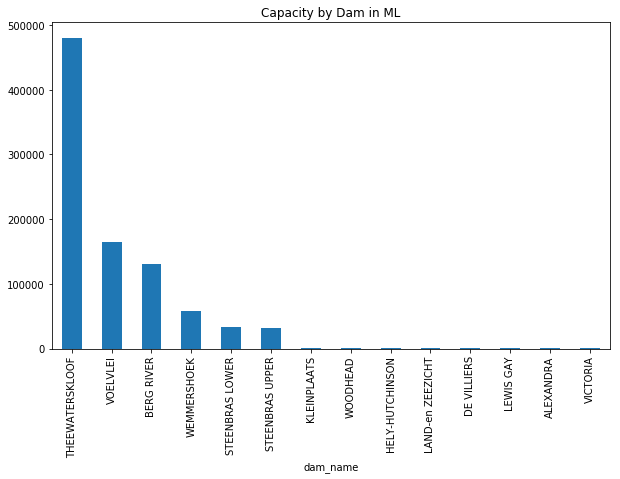

In [51]:
#looking at the total capacity by Dam using the plot() method

df.groupby('dam_name').mean()['Max_dam_capacity_ML'].sort_values(ascending=False).plot(kind='bar',
                                                                              title='Capacity by Dam in ML',
                                                                              figsize=(10,6))

In [45]:
#So let's group by dam class to see how many of each class there are.

df.groupby('dam_class')['dam_name'].nunique()

dam_class
Major Dam    6
Minor Dam    8
Name: dam_name, dtype: int64

In [48]:
#It seems like the 6 major dams are where we need to focus the analysis.
#To prove this let's look at the difference in the stats for Major Dams vs Minor Dams
#Here we just group by dam class.

df.groupby('dam_class').mean()[['height_m', 'Max_dam_capacity_ML', 'storage_ml', 'percentage_capacity']]

,height_m,Max_dam_capacity_ML,storage_ml,percentage_capacity
dam_class,,,,
Major Dam,26.307644,149703.5,97679.870210,0.681342
Minor Dam,14.969839,538.0,380.122562,0.687563


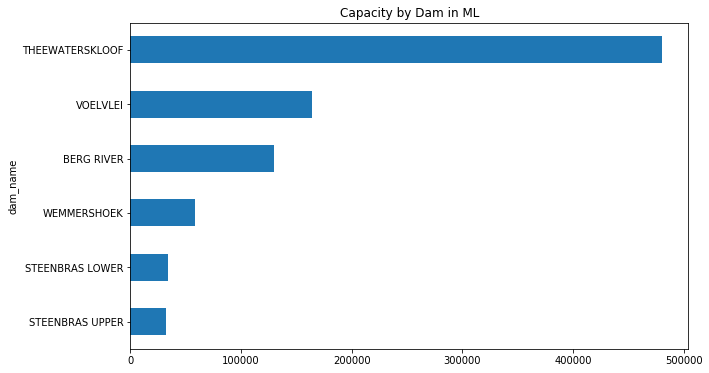

In [56]:
df[df['dam_class'] == 'Major Dam']\
    .groupby('dam_name').mean()['Max_dam_capacity_ML']\
    .sort_values(ascending=True).plot(
        kind='barh',                                        
        # bar makes a horizontal bar graph
        title='Capacity by Dam in ML',
        figsize=(10,6))

In [57]:
#Let's store the order from the chart above for future charting

major_dam_order = list(df[df['dam_class'] == 'Major Dam']\
                            .groupby('dam_name')\
                            .mean()['Max_dam_capacity_ML']\
                            .sort_values(ascending=False).index)

In [58]:
#Now we will look at the dam levels over time for the Major dams. 
#Because we are only concered about the Major dams, we must filter where dam class is equal to Major Dam. 
#We then group by year and to look at the averages over time.

df[df['dam_class'] == 'Major Dam'].groupby('t_year').mean()[['height_m',
                                                             'Max_dam_capacity_ML',
                                                             'storage_ml',
                                                             'percentage_capacity']]

,height_m,Max_dam_capacity_ML,storage_ml,percentage_capacity
t_year,,,,
2012,27.727104,149703.5,111930.370674,0.757864
2013,29.173582,149703.5,127261.868950,0.840822
2014,29.695543,149703.5,133870.403653,0.872620
2015,26.245233,149703.5,96494.457078,0.662750
2016,23.588174,149703.5,69408.846995,0.530332
2017,21.421100,149703.5,47151.686301,0.423870


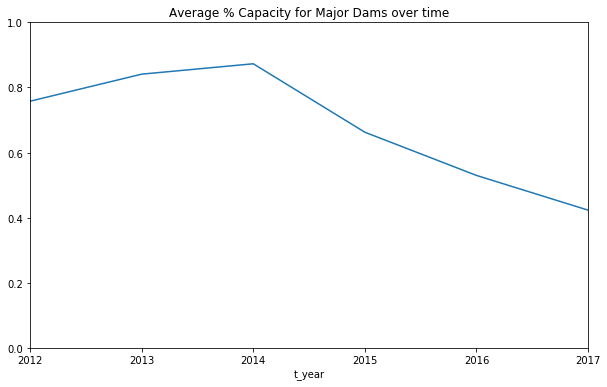

In [59]:
#looking at the percentage capacity using a line graph.
df[df['dam_class'] == 'Major Dam'].groupby('t_year').mean()['percentage_capacity']\
.plot(kind='line', title='Average % Capacity for Major Dams over time', figsize=(10,6), ylim=(0,1))

In [60]:
#We want to know which Major dams are currently doing best and worst. 
#Let's look at the current percentage capacity for Major dams.
#We will need to have multiple filters (latest date and Major dam) and then group by dam name.

# Create latest date in data
latest_date = df.max()[0]

# Latest percentage capacity per dam
df[(df['t_date'] == latest_date) & (df['dam_class'] == 'Major Dam')]\
.groupby('dam_name')\
.mean()['percentage_capacity']\
.sort_values()\

dam_name
THEEWATERSKLOOF    0.185
VOELVLEI           0.224
STEENBRAS LOWER    0.508
WEMMERSHOEK        0.518
BERG RIVER         0.593
STEENBRAS UPPER    0.950
Name: percentage_capacity, dtype: float64

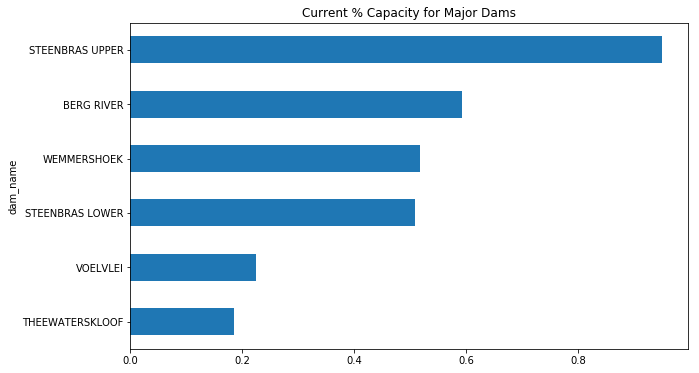

In [61]:
#visualise the data using a horizontal barchart.
df[(df['t_date'] == latest_date) & (df['dam_class'] == 'Major Dam')]\
    .groupby('dam_name')\
    .mean()['percentage_capacity']\
    .sort_values()\
    .plot(
        kind='barh',
        title='Current % Capacity for Major Dams',
        figsize=(10,6),
        ylim=(0,1))

Text(0.5,0.95,'Histogram of dam level capacity')

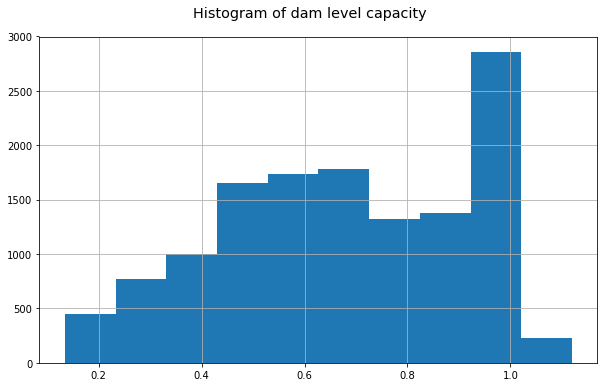

In [62]:
#looking at the Dam distribution level by using graph
df[df['dam_class'] == 'Major Dam']['percentage_capacity']\
    .hist(figsize=(10,6))
plt.suptitle('Histogram of dam level capacity', x=0.5, y=.95, ha='center', fontsize='x-large')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

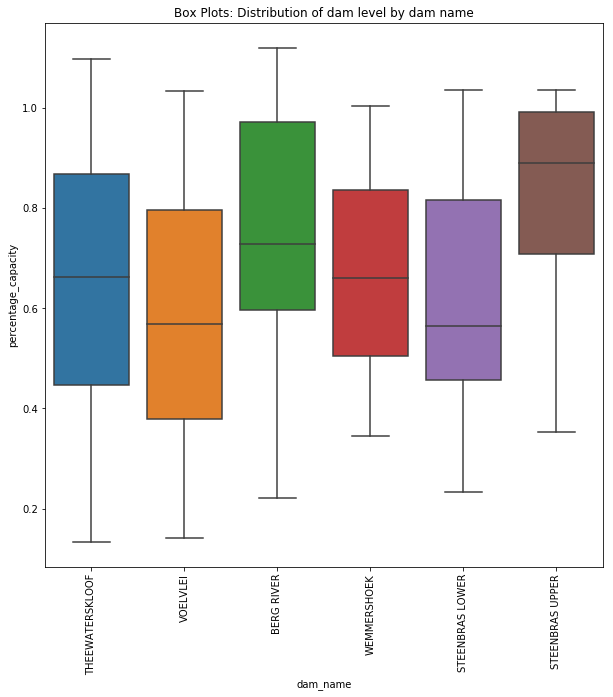

In [65]:
#use the box plot to analyse numerical variables by catagories 
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(
    x='dam_name',
    y='percentage_capacity',
    data= df[df['dam_class'] == 'Major Dam'],
    order=major_dam_order,
    ax=ax)
ax.set_title('Box Plots: Distribution of dam level by dam name')
plt.grid(False)
plt.xticks(rotation=90)

In [66]:
#Let's create a new dataframe called problem_dam and then only select entries from the Theewaterskloof dam.
problem_dam = df[df['dam_name'] == 'THEEWATERSKLOOF']
problem_dam.head()

,t_date,month_year,t_month,t_year,dam_name,dam_class,Max_dam_capacity_ML,height_m,storage_ml,percentage_capacity
19728,01/01/2012,Jan-12,1,2012,THEEWATERSKLOOF,Major Dam,480188,24.83,357963.0,0.745
19729,02/01/2012,Jan-12,1,2012,THEEWATERSKLOOF,Major Dam,480188,24.80,356677.0,0.743
19730,03/01/2012,Jan-12,1,2012,THEEWATERSKLOOF,Major Dam,480188,24.77,355394.0,0.740
19731,04/01/2012,Jan-12,1,2012,THEEWATERSKLOOF,Major Dam,480188,24.73,353687.0,0.737
19732,05/01/2012,Jan-12,1,2012,THEEWATERSKLOOF,Major Dam,480188,24.67,351135.0,0.731


In [69]:
#sort by percetage capacity (from lowest to highest) and then select the first entry using iloc[0].
problem_dam.sort_values(by='percentage_capacity').iloc[0]

t_date                      07/06/2017
month_year                      Jun-17
t_month                              6
t_year                            2017
dam_name               THEEWATERSKLOOF
dam_class                    Major Dam
Max_dam_capacity_ML             480188
height_m                         13.47
storage_ml                       64425
percentage_capacity              0.134
Name: 21712, dtype: object

In [70]:
#looking at the latest date in the data
problem_dam.sort_values(by='t_date', ascending=False).iloc[0]

t_date                      31/12/2017
month_year                      Dec-17
t_month                             12
t_year                            2017
dam_name               THEEWATERSKLOOF
dam_class                    Major Dam
Max_dam_capacity_ML             480188
height_m                         15.32
storage_ml                       88717
percentage_capacity              0.185
Name: 21919, dtype: object

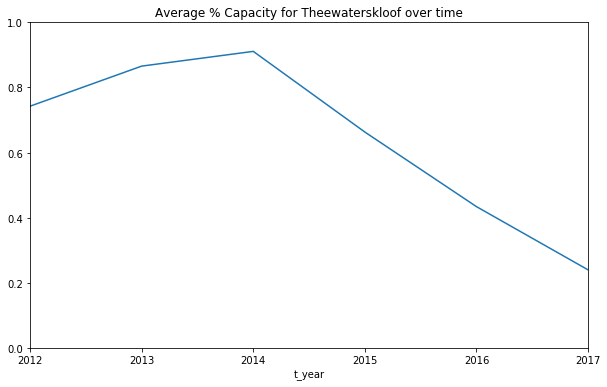

In [71]:
#checking how the percentage capacity over time looks like for the Theewaterskloof
problem_dam.groupby('t_year').mean()['percentage_capacity']\
.plot(kind='line', title='Average % Capacity for Theewaterskloof over time', figsize=(10,6), ylim=(0,1))